<a href="https://colab.research.google.com/github/Ayryslaine/projeto_2_pre_proc_dados/blob/main/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo

**Professor: Albaro Ramon Paiva Sanz**

**Aluna: Ayryslaine Kelle de Nézio Leal, Brenno Vale e Jeová Anderson**

# Descrição do projeto


**Uma empresa que oferece empréstimos a pessoas físicas precisa saber, com base nos dados de seus clientes, quais novos clientes poderão ou não acessar o crédito (empréstimo) solicitado.**

**Faça uma pergunta, por exemplo: Qual é a probabilidade de aprovação/risco de cada novo cliente, considerando suas informações cadastrais e financeiras? A partir daí, defino os objetivos para resolver o problema em CD.**

# Importando bibliotecas necessárias

In [ ]:
pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import time
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importando banco de dados da atividade

In [ ]:
df = pd.read_csv("/content/emprestamo.csv", sep=",")

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Visualização geral dos tipos de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Com esta função da biblioteca Pandas, podemos ter informações gerais de nosso banco de dados, como a quantidade de colunas que possuem variáveis em float, int e object, além de ser possível visulizar a quantidade de dados em nosso dataset, assim como a quantidade de valores não nulos, dessa forma já sabemos de imediato que as colunas "Gender", "Married", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term" e "Credit_History" possuem valores nulos.

# Padronizando o nome das colunas para PT-BR

In [ ]:
df = df.rename(columns={"Loan_ID":"ID",
           "Gender":"Genero",
           "Married":"Casado",
           "Dependents":"Dependentes",
           "Education":"Escolaridade",
           "Self_Employed":"trabalhador autônomo",
           "ApplicantIncome":"Renda do requerente",
           "CoapplicantIncome":"Renda do co-requerente",
           "LoanAmount":"Valor do empréstimo solicitado/aprovado",
           "Loan_Amount_Term":"Prazo do empréstimo (em meses)",
           "Credit_History":"Indicador de histórico de crédito",
           "Property_Area":"Zona/área de residência do requerente",
           "Loan_Status":"Status final do pedido de empréstimo"
})

# Visualizando o Banco de Dados após renomear as colunas

In [ ]:
df

,ID,Genero,Casado,Dependentes,Escolaridade,trabalhador autônomo,Renda do requerente,Renda do co-requerente,Valor do empréstimo solicitado/aprovado,Prazo do empréstimo (em meses),Indicador de histórico de crédito,Zona/área de residência do requerente,Status final do pedido de empréstimo
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Padronizando os dados das colunas para melhor entendimento

In [ ]:
df = df.replace({"Male":"Masculino",
                 "Female":"Feminino",
                 "No":"Não",
                 "Yes":"Sim",
                 "Graduate":"Graduado",
                 "Not Graduate":"Não Graduado",
                 "Urban":"Urbano",
                 "Semiurban":"Semiurbano",
                 "Y":"Aprovado",
                 "N":"Não aprovado"
})

df

,ID,Genero,Casado,Dependentes,Escolaridade,trabalhador autônomo,Renda do requerente,Renda do co-requerente,Valor do empréstimo solicitado/aprovado,Prazo do empréstimo (em meses),Indicador de histórico de crédito,Zona/área de residência do requerente,Status final do pedido de empréstimo
0,LP001002,Masculino,Não,0,Graduado,Não,5849,0.0,NaN,360.0,1.0,Urbano,Aprovado
1,LP001003,Masculino,Sim,1,Graduado,Não,4583,1508.0,128.0,360.0,1.0,Rural,Não aprovado
2,LP001005,Masculino,Sim,0,Graduado,Sim,3000,0.0,66.0,360.0,1.0,Urbano,Aprovado
3,LP001006,Masculino,Sim,0,Não Graduado,Não,2583,2358.0,120.0,360.0,1.0,Urbano,Aprovado
4,LP001008,Masculino,Não,0,Graduado,Não,6000,0.0,141.0,360.0,1.0,Urbano,Aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Feminino,Não,0,Graduado,Não,2900,0.0,71.0,360.0,1.0,Rural,Aprovado
610,LP002979,Masculino,Sim,3+,Graduado,Não,4106,0.0,40.0,180.0,1.0,Rural,Aprovado
611,LP002983,Masculino,Sim,1,Graduado,Não,8072,240.0,253.0,360.0,1.0,Urbano,Aprovado
612,LP002984,Masculino,Sim,2,Graduado,Não,7583,0.0,187.0,360.0,1.0,Urbano,Aprovado


Nas células acima, padronizamos nosso banco de dados do Inglês para o Português PT-BR para melhores entendimentos e consultas posteriores.

# Diagnóstico do Banco de Dados

In [ ]:
def diagnostico(df):
  print(f"--- Diagnóstico do Banco de dados---")
  print("\nValores nulos por coluna:\n")
  display(df.isnull().sum())
  print("\nDuplicados:", df.duplicated().sum())

diagnostico(df)

--- Diagnóstico do Banco de dados---

Valores nulos por coluna:



,0
ID,0
Genero,13
Casado,3
Dependentes,15
Escolaridade,0
trabalhador autônomo,32
Renda do requerente,0
Renda do co-requerente,0
Valor do empréstimo solicitado/aprovado,22
Prazo do empréstimo (em meses),14



Duplicados: 0


Nesta célula, a partir da função diagnostico foi possível constatar quais colunas possuem valores nulos (exatamente as que foram informadas acima) e também se possuem valores duplicados que neste caso, não possuem nenhum

# Métricas estatísticas

In [ ]:
df.describe()

,Renda do requerente,Renda do co-requerente,Valor do empréstimo solicitado/aprovado,Prazo do empréstimo (em meses),Indicador de histórico de crédito
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df.describe(include=[object])

,ID,Genero,Casado,Dependentes,Escolaridade,trabalhador autônomo,Zona/área de residência do requerente,Status final do pedido de empréstimo
count,614,614,614,614,614,614,614,614
unique,614,3,3,4,2,3,3,2
top,LP002990,Masculino,Sim,0,Graduado,Não,Semiurbano,Aprovado
freq,1,489,398,360,480,500,233,422


Nas células acima, podemos visualizar as métricas estatísticas de nossas variáveis numéricas e categóricas. Nas variáveis numéricas, podemos observar a média, o valor mínimo e máximo, assim como os quartis. Já nas variáveis categóricas, encontramos informações como valores que apareçam com maior frequência e a frequência com que aparecem e os valores únicos das respectivas colunas.

# Mudando o NAN das variáveis categóricas para Não informado

In [ ]:
def dados(df):
    for coluna in ["Genero","Casado", "trabalhador autônomo"]:
        df[coluna] = df[coluna].fillna("Não informado")
    return df

df = dados(df)

df

,ID,Genero,Casado,Dependentes,Escolaridade,trabalhador autônomo,Renda do requerente,Renda do co-requerente,Valor do empréstimo solicitado/aprovado,Prazo do empréstimo (em meses),Indicador de histórico de crédito,Zona/área de residência do requerente,Status final do pedido de empréstimo
0,LP001002,Masculino,Não,0,Graduado,Não,5849,0.0,NaN,360.0,1.0,Urbano,Aprovado
1,LP001003,Masculino,Sim,1,Graduado,Não,4583,1508.0,128.0,360.0,1.0,Rural,Não aprovado
2,LP001005,Masculino,Sim,0,Graduado,Sim,3000,0.0,66.0,360.0,1.0,Urbano,Aprovado
3,LP001006,Masculino,Sim,0,Não Graduado,Não,2583,2358.0,120.0,360.0,1.0,Urbano,Aprovado
4,LP001008,Masculino,Não,0,Graduado,Não,6000,0.0,141.0,360.0,1.0,Urbano,Aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Feminino,Não,0,Graduado,Não,2900,0.0,71.0,360.0,1.0,Rural,Aprovado
610,LP002979,Masculino,Sim,3+,Graduado,Não,4106,0.0,40.0,180.0,1.0,Rural,Aprovado
611,LP002983,Masculino,Sim,1,Graduado,Não,8072,240.0,253.0,360.0,1.0,Urbano,Aprovado
612,LP002984,Masculino,Sim,2,Graduado,Não,7583,0.0,187.0,360.0,1.0,Urbano,Aprovado


Para as variáveis categóricas, sendo elas Gênero, Casado e trabalhador autônomo, decidimos substituir os valores nulos para "não informado". Esses tipos de informações pessoais, algumas pessoas evitam ou não gostam de declarar,logo é possível inteirar as informações como "Não informado", nesse sentido, decidimos utilizar do mesmo raciocínio para o nosso banco de dados, dessa forma não é criado informações que não existem e não distorce a distribuição original.

# Preenchendo os valores nulos das variáveis numéricas e da coluna dependentes

In [ ]:
def media(df,coluna):
  df[coluna] = df[coluna].fillna(df[coluna].mean())

media(df, "Prazo do empréstimo (em meses)")
media(df, "Valor do empréstimo solicitado/aprovado")

In [ ]:
def moda(df,coluna):
  df[coluna] = df[coluna].fillna(df[coluna].mode()[0])

moda(df, "Indicador de histórico de crédito")
moda(df, "Dependentes")

Para as variáveis númericas, decidimos preencher os valores nulos com a média e também com a moda. Para as colunas "Prazo do empréstimo (em meses)" e "Valor do empréstimo solicitado/aprovado" decidimos preencher os valores nulos com a média pois analisando as métricas estatísticas e os valores apresentados nas respectivas coluna, esses valores não se dispersavam tanto em relação a média, sendo possível utilizá-los. Já para as colunas "Indicador de histórico de crédito" e "Dependentes", utilizamos a moda pois o preenchimento mantém a consistência dos dados, sem alterar muito a distribuição original, sendo assim aparecerá o valor mais provável para os casos onde a informação está faltando.

# Visualizações gráficas

Matriz de Correlação

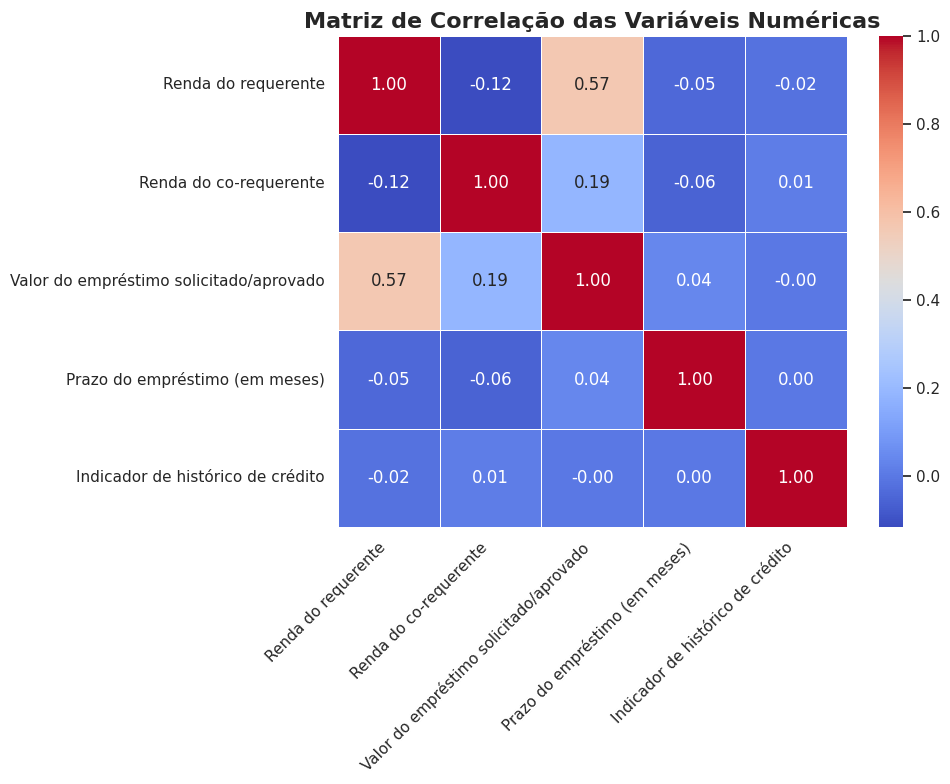

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

No gráfico de matriz de correlação podemos perceber que poucas variáveis possuam uma porcentagem de correlação muito alta, sendo em sua maioria, porcentagens negativas ou abaixo de 10%. Porém, há uma relação considerável (mesmo que pequena) entre Valor do empréstimo solicitado/aprovado com Renda do requerente e Valor do empréstimo solicitado/aprovado com Renda do co-requerente, sendo suas porcentagens de 57% e 19%, respectivamente

*Gênero*

/tmp/ipython-input-194883158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Genero", palette="colorblind")


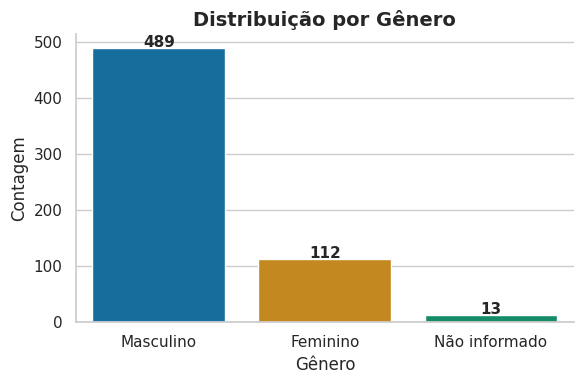


A porcentagem do sexo masculino é: 79.64%

A porcentagem do sexo feminino é: 18.24%

A porcentagem do sexo Não informado é: 2.12%


In [ ]:
sns.set(style="whitegrid", palette="colorblind")

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="Genero", palette="colorblind")

plt.title('Distribuição por Gênero', fontsize=14, weight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 2,
            int(p.get_height()),
            ha='center', fontsize=11, weight='bold')

sns.despine()
plt.tight_layout()
plt.show()

genero = df['Genero'].value_counts()

print(f"\nA porcentagem do sexo masculino é: {genero['Masculino']/genero.sum() * 100:.2f}%")
print(f"\nA porcentagem do sexo feminino é: {genero['Feminino']/genero.sum() * 100:.2f}%")
print(f"\nA porcentagem do sexo Não informado é: {genero['Não informado']/genero.sum() * 100:.2f}%")

No gráfico de distribuição por gênero, podemos perceber que a maior quantidade de pessoas é do sexo masculino com uma porcentagem de 79.64%, seguido por pessoas do sexo feminino com 18.24% e uma pequena minoria de pessoas "Não informado" com 2.12%.

*Gênero por Estado Civil*

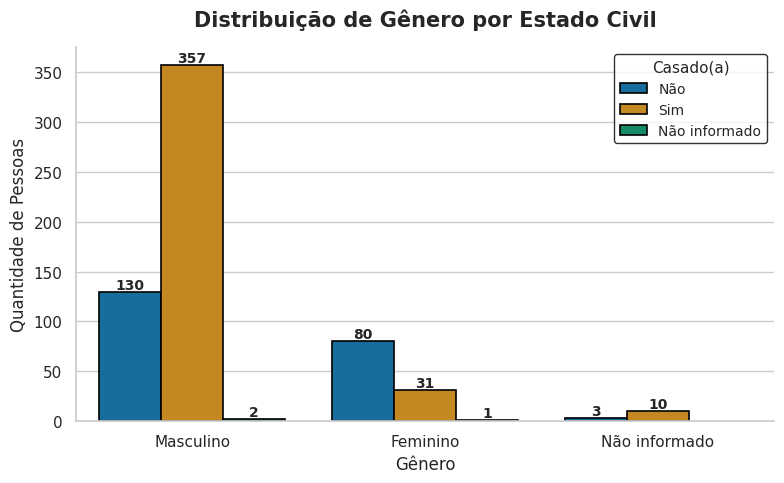

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.countplot(
    x='Genero',
    hue='Casado',
    data=df,
    palette='colorblind',  #paleta acessível para daltônicos
    edgecolor='black',
    linewidth=1.2
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, weight='bold')

plt.title('Distribuição de Gênero por Estado Civil', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)

plt.legend(
    title='Casado(a)',
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

sns.despine()
plt.tight_layout()
plt.show()

Já neste gráfico podemos visualizar que a maior distribuição está concentrada em pessoas do sexo masculino, principalmente casados e depois temos logo em seguidos também pessoas do sexo masculino sendo que solteiras ou não casadas.

*Escolaridade e Gênero*

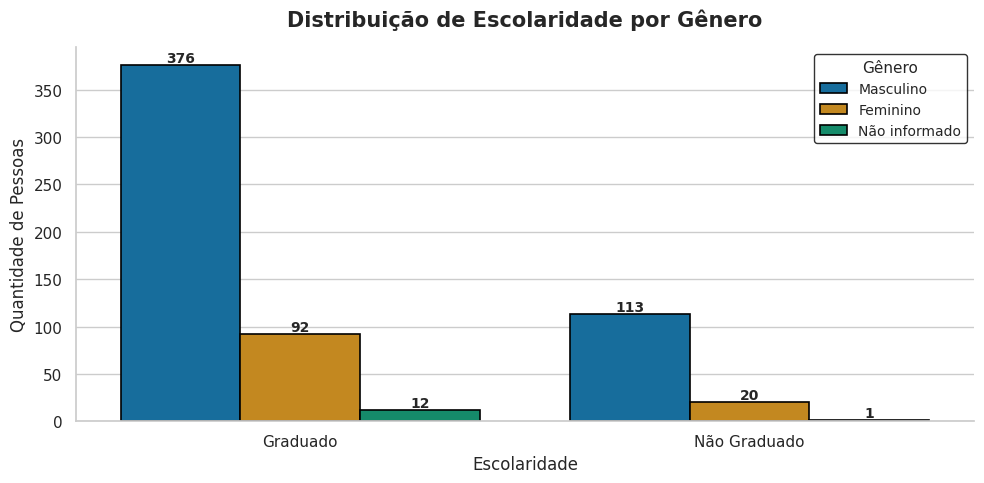

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

ax = sns.countplot(
    x='Escolaridade',
    hue='Genero',
    data=df,
    palette='colorblind',  #paleta acessível para daltônicos
    edgecolor='black',
    linewidth=1.2
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, weight='bold')

plt.title('Distribuição de Escolaridade por Gênero', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)

plt.legend(
    title='Gênero',
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

sns.despine()
plt.tight_layout()
plt.show()


Neste gráfico podemos observar que a maior concentração de distribuição está em pessoas do gênero masculino que são graduadas, ou seja, possível algum grau de instrução acadêmica. Logo em seguido, temos que a segunda maior distribuição são pessoas do gênero masculino não graduadas.

*Escolaridade por Renda*

/tmp/ipython-input-3115069341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


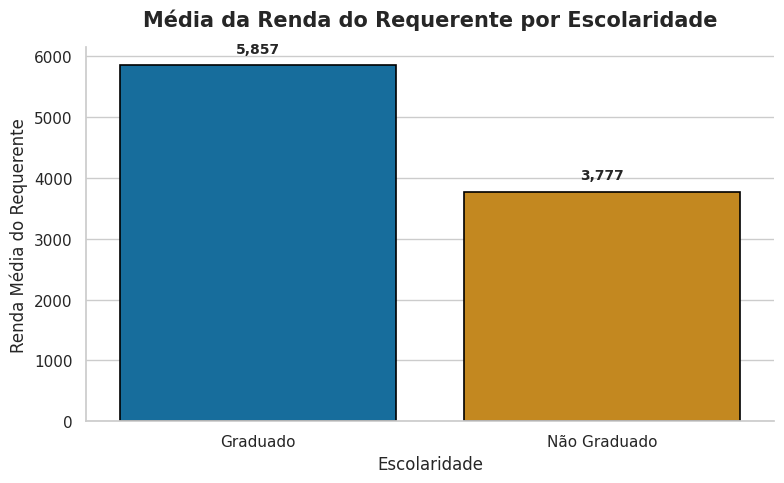

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='Escolaridade',
    y='Renda do requerente',
    data=df,
    palette='colorblind',   #paleta acessível para daltônicos
    edgecolor='black',
    linewidth=1.2,
    errorbar=None  #remove as barras de erro, se não forem necessárias
)

for p in ax.patches:
    valor = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        valor + 200,
        f'{valor:,.0f}',
        ha='center',
        fontsize=10,
        weight='bold'
    )

plt.title('Média da Renda do Requerente por Escolaridade', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Renda Média do Requerente', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()


Já neste gráfico podemos perceber que pessoas com um certo nível de instrução acadêmica possue uma média de renda maior do que pessoas não graduadas, ou seja, sem um grau de instrução. Isso indica uma relação positiva entre escolaridade e renda, ou seja, quanto maior o nível de instrução, maior tende a ser a renda.

*Status do Empréstimo por Gênero*

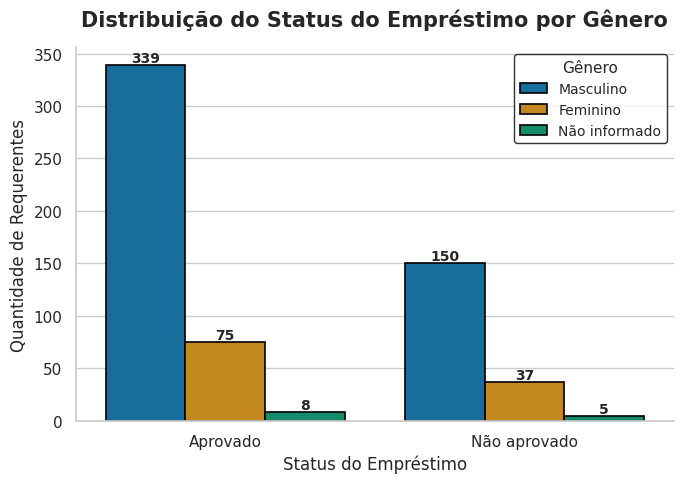

In [ ]:
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")

ax = sns.countplot(
    x='Status final do pedido de empréstimo',
    hue='Genero',
    data=df,
    palette='colorblind',  # paleta para daltônicos
    edgecolor='black',
    linewidth=1.2
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, weight='bold')

plt.title('Distribuição do Status do Empréstimo por Gênero', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Status do Empréstimo', fontsize=12)
plt.ylabel('Quantidade de Requerentes', fontsize=12)

plt.legend(
    title='Gênero',
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

sns.despine()
plt.tight_layout()
plt.show()

Aqui podemos inferir que a maior quantidade de pessoas que foram aprovadas em suas solicitações de empréstimo foram pessoas do gênero masculino. Também podemos observar que a maior quantidade de pessoas que o empréstimo foi negado foram pessoas também do sexo masculino.

*Distribuição de Trabalhadores Autônomos*

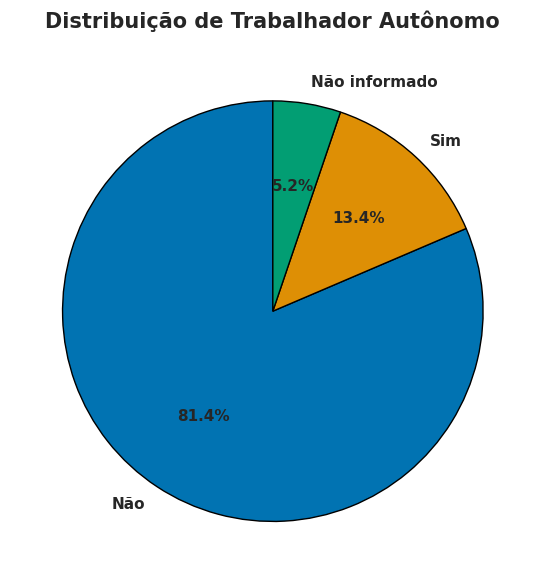

In [ ]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")

autonomo_counts = df['trabalhador autônomo'].value_counts()

colors = sns.color_palette("colorblind")  # paleta acessível para daltônicos
plt.pie(
    autonomo_counts,
    labels=autonomo_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Distribuição de Trabalhador Autônomo', fontsize=15, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

Neste gráfico de pizza podemos inferir as proporções para declarações de trabalhadores autônomos, onde a maior porcentagem, com 81.4% quase 90%, se concentra em pessoas que não afirmam-se como trabalhadores autônomos. Logo em seguida, temos com 13.4% as pessoas que afirmam-se como trabalhores autônomos.

*Status do Empréstimo por Condição de Trabalhador Autônomo*

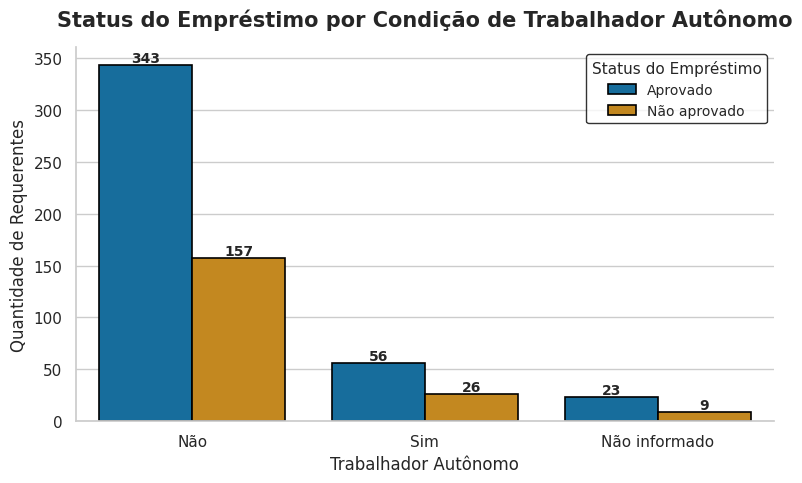

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

column_name_autonomo = 'trabalhador autônomo'

ax = sns.countplot(
    x=column_name_autonomo,
    hue='Status final do pedido de empréstimo',
    data=df,
    palette='colorblind',
    edgecolor='black',
    linewidth=1.2
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, weight='bold')

plt.title('Status do Empréstimo por Condição de Trabalhador Autônomo', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Trabalhador Autônomo', fontsize=12)
plt.ylabel('Quantidade de Requerentes', fontsize=12)

plt.legend(
    title='Status do Empréstimo',
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

sns.despine()
plt.tight_layout()
plt.show()

O gráfico mostra que a maior parte dos requerentes não é trabalhador autônomo, e esse grupo também concentra a maior quantidade de empréstimos aprovados e não aprovados. Entre os autônomos, o número de aprovações é bem menor, sugerindo que essa condição pode influenciar negativamente a concessão de crédito — possivelmente pela maior instabilidade de renda.

*Distribuição do Histórico de Crédito por Trabalhador Autônomo*

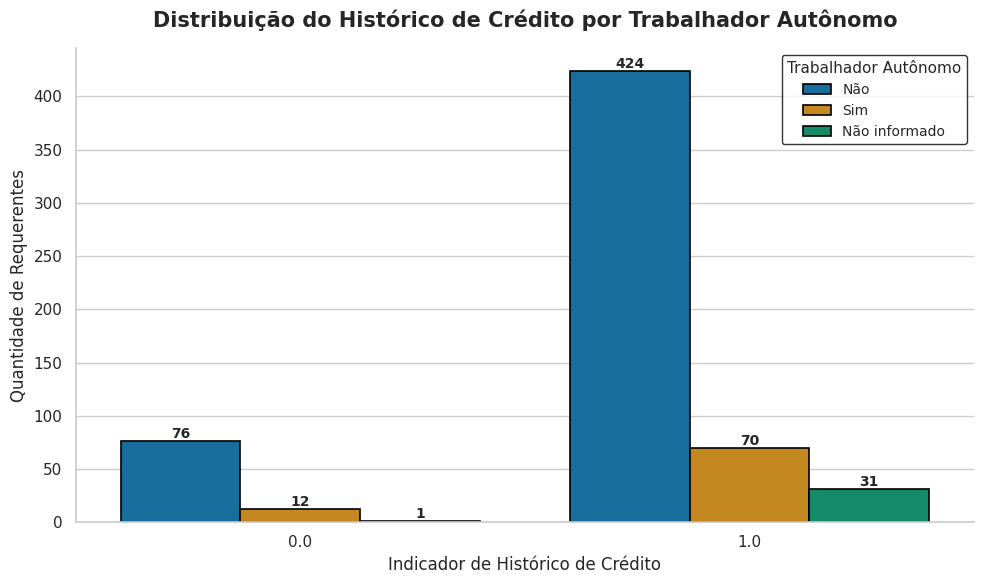

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    x='Indicador de histórico de crédito',
    hue='trabalhador autônomo',
    data=df,
    palette='colorblind',
    edgecolor='black',
    linewidth=1.2
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, weight='bold')

plt.title('Distribuição do Histórico de Crédito por Trabalhador Autônomo', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Indicador de Histórico de Crédito', fontsize=12)
plt.ylabel('Quantidade de Requerentes', fontsize=12)

plt.legend(
    title='Trabalhador Autônomo',
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

sns.despine()
plt.tight_layout()
plt.show()

Observa-se que os requerentes não autônomos são maioria tanto no histórico de crédito positivo quanto no negativo. Porém, o mais interessante é que a maior parte dos indivíduos com histórico de crédito positivo não é autônoma, reforçando a tendência de que pessoas empregadas formalmente apresentam maior regularidade financeira. Autônomos aparecem em menor número em ambos os casos.

*Zona/área de residência do requerente*

/tmp/ipython-input-3577351398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


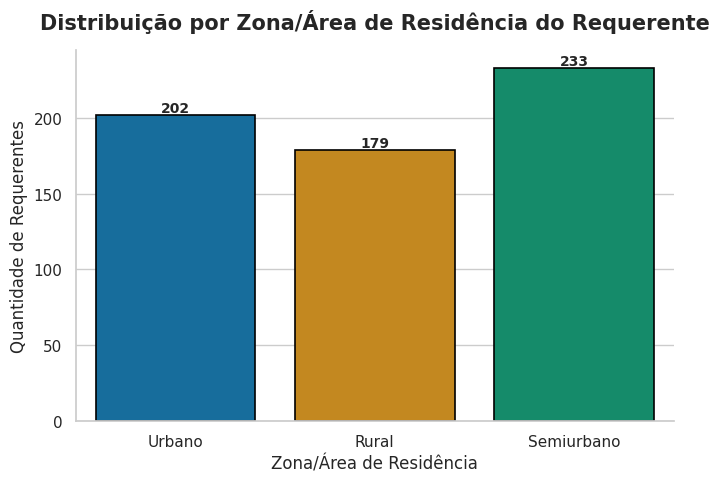

In [ ]:
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")

ax = sns.countplot(
    x='Zona/área de residência do requerente',
    data=df,
    palette='colorblind',   #paleta acessível para daltônicos
    edgecolor='black',
    linewidth=1.2
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, weight='bold')

plt.title('Distribuição por Zona/Área de Residência do Requerente', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Zona/Área de Residência', fontsize=12)
plt.ylabel('Quantidade de Requerentes', fontsize=12)

plt.xticks(rotation=0, ha='center')

sns.despine()
plt.tight_layout()
plt.show()

A maior parte dos requerentes vive na área semiurbana, seguida por urbana e, por fim, rural. Isso mostra que a demanda por empréstimos é mais concentrada em regiões com características intermediárias entre grandes centros e áreas rurais — possivelmente onde há maior número de famílias que dependem de crédito para financiar moradia, consumo ou pequenos negócios.

*Indicador de histórico de crédito*

/tmp/ipython-input-1485917009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


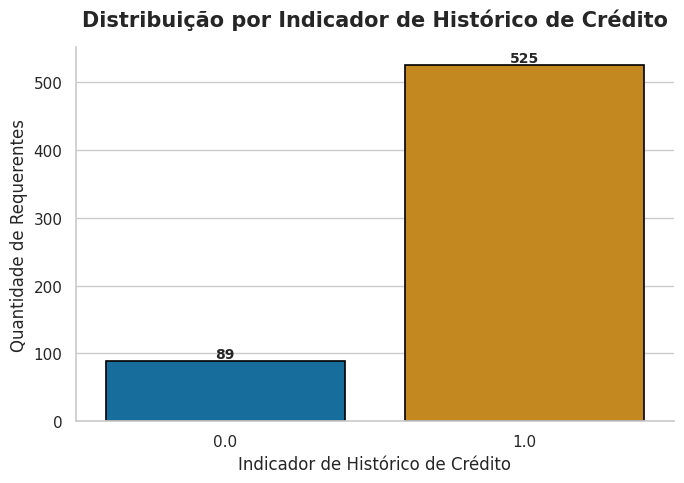

In [ ]:
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")

ax = sns.countplot(
    x='Indicador de histórico de crédito',
    data=df,
    palette='colorblind',  # paleta acessível para daltônicos
    edgecolor='black',
    linewidth=1.2
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, weight='bold')

plt.title('Distribuição por Indicador de Histórico de Crédito', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Indicador de Histórico de Crédito', fontsize=12)
plt.ylabel('Quantidade de Requerentes', fontsize=12)

plt.xticks(rotation=0, ha='center')

sns.despine()
plt.tight_layout()
plt.show()

A grande maioria dos requerentes possui histórico de crédito positivo, enquanto apenas uma pequena parcela está com histórico negativo. Isso indica que o público que busca empréstimos no banco tende a ser formado por pessoas com bom comportamento de crédito, o que pode influenciar para uma taxa maior de aprovações na instituição.

*Distribuição do Histórico de Crédito por Status final do pedido de empréstimo*

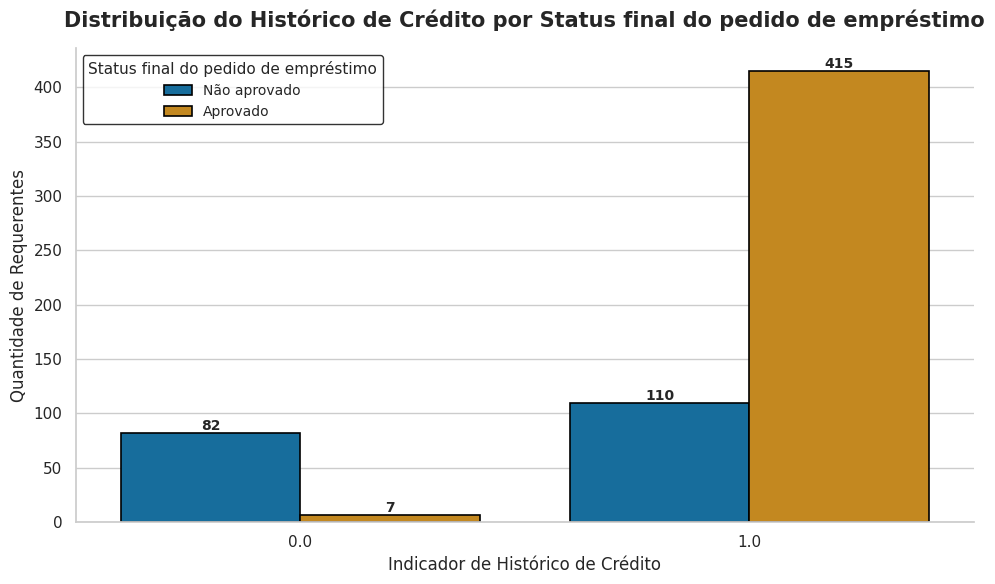

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    x='Indicador de histórico de crédito',
    hue='Status final do pedido de empréstimo',
    data=df,
    palette='colorblind',
    edgecolor='black',
    linewidth=1.2
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, weight='bold')

plt.title('Distribuição do Histórico de Crédito por Status final do pedido de empréstimo', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Indicador de Histórico de Crédito', fontsize=12)
plt.ylabel('Quantidade de Requerentes', fontsize=12)

plt.legend(
    title='Status final do pedido de empréstimo',
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

sns.despine()
plt.tight_layout()
plt.show()

Com base nos gráficos, a inferência principal é que o histórico de crédito (gráfico 1) é um fator decisivo para a aprovação do empréstimo. Pessoas com bom histórico (1.0) são majoritariamente aprovadas (415 vs 110), enquanto as com histórico ruim (0.0) são majoritariamente reprovadas (82 vs 7).

*Distribuição da Renda do Requerente*

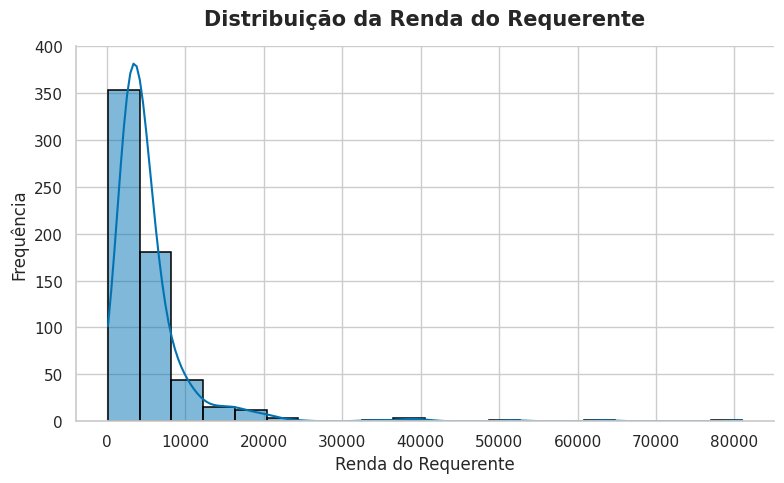

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.histplot(
    data=df,
    x='Renda do requerente',
    kde=True,
    color=sns.color_palette("colorblind")[0],
    edgecolor='black',
    linewidth=1.1,
    bins=20
)

plt.title('Distribuição da Renda do Requerente', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Renda do Requerente', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

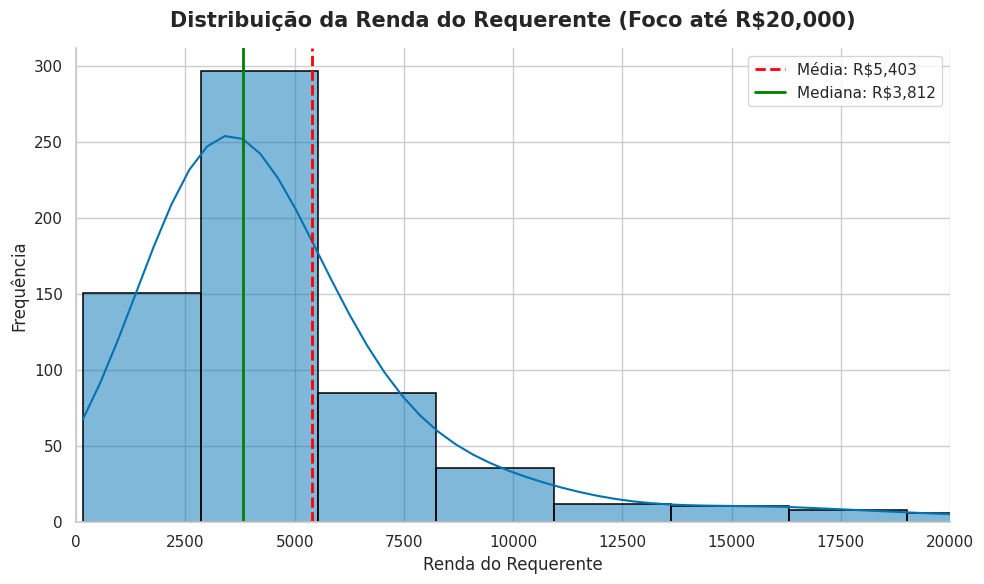

In [ ]:
renda_media = df['Renda do requerente'].mean()
renda_mediana = df['Renda do requerente'].median()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(
    data=df,
    x='Renda do requerente',
    kde=True,
    color=sns.color_palette("colorblind")[0],
    edgecolor='black',
    linewidth=1.1,
    bins=30
)

plt.axvline(renda_media, color='red', linestyle='--', linewidth=2,
            label=f'Média: R${renda_media:,.0f}')
plt.axvline(renda_mediana, color='green', linestyle='-', linewidth=2,
            label=f'Mediana: R${renda_mediana:,.0f}')

limite_x = 20000
plt.xlim(0, limite_x)

plt.title(f'Distribuição da Renda do Requerente (Foco até R${limite_x:,.0f})',
          fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Renda do Requerente', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()

sns.despine()
plt.tight_layout()
plt.show()

A vasta maioria dos requerentes se concentra na faixa de renda mais baixa, com o pico mais alto ocorrendo bem no início do gráfico, concentrado entre as rendas de 0-10.000. A frequência de requerentes diminui rapidamente à medida que a renda aumenta. Existem muito poucos requerentes com rendas altas (acima de 30.000), que aparecem como "outliers" (pontos fora da curva) na distribuição.Logo, a base de clientes que solicita esses empréstimos é composta, predominantemente, por pessoas de renda baixa a moderada.

# Machine Learning

## Pré-processar dados


Convertendo features categóricas em representações numéricas usando one-hot encoding.


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('ID')

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())

,ID,Renda do requerente,Renda do co-requerente,Valor do empréstimo solicitado/aprovado,Prazo do empréstimo (em meses),Indicador de histórico de crédito,Genero_Masculino,Genero_Não informado,Casado_Não informado,Casado_Sim,Dependentes_1,Dependentes_2,Dependentes_3+,Escolaridade_Não Graduado,trabalhador autônomo_Não informado,trabalhador autônomo_Sim,Zona/área de residência do requerente_Semiurbano,Zona/área de residência do requerente_Urbano,Status final do pedido de empréstimo_Não aprovado
0,LP001002,5849,0.0,146.412162,360.0,1.0,True,False,False,False,False,False,False,False,False,False,False,True,False
1,LP001003,4583,1508.0,128.000000,360.0,1.0,True,False,False,True,True,False,False,False,False,False,False,False,True
2,LP001005,3000,0.0,66.000000,360.0,1.0,True,False,False,True,False,False,False,False,False,True,False,True,False
3,LP001006,2583,2358.0,120.000000,360.0,1.0,True,False,False,True,False,False,False,True,False,False,False,True,False
4,LP001008,6000,0.0,141.000000,360.0,1.0,True,False,False,False,False,False,False,False,False,False,False,True,False


## Treinamento


In [ ]:
# corrigindo o nome da coluna alvo apos one-hot encoding

X = df.drop("Status final do pedido de empréstimo_Não aprovado", axis=1)
y = df["Status final do pedido de empréstimo_Não aprovado"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# separando id do df teste pra posteriormente conseguirmos identificar quem é quem
X_test_no_id = X_test.drop('ID', axis=1)
X_train_no_id = X_train.drop('ID', axis=1)

print("Shape of X_train_no_id:", X_train_no_id.shape)
print("Shape of X_test_no_id:", X_test_no_id.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_no_id: (491, 17)
Shape of X_test_no_id: (123, 17)
Shape of y_train: (491,)
Shape of y_test: (123,)


Neste trecho, os dados são preparados para treinar modelos de machine learning. A variável alvo que indica se o empréstimo foi aprovado é separada do restante das variáveis preditoras. Em seguida, os dados são divididos em conjuntos de treino e teste (80/20), garantindo que o modelo possa ser avaliado com dados que ele nunca viu.

Além disso, a coluna de identificação (ID) é removida dos conjuntos de entrada para evitar que o modelo aprenda padrões irrelevantes. Por fim, o código imprime as dimensões dos conjuntos resultantes, permitindo verificar se a separação foi feita corretamente.

Escolhendo os modelos e treinando

In [ ]:
models = {}
trained_models = {}
training_times = {}

models['CatBoost'] = CatBoostClassifier(random_state=42, verbose=0)
models['Decision Tree'] = DecisionTreeClassifier(random_state=42)
models['XGBoost'] = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
models['Random Forest'] = RandomForestClassifier(random_state=42)
models['Logistic Regression'] = LogisticRegression(random_state=42)

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_no_id, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time
    trained_models[name] = model

print("Training Times:")
for name, train_time in training_times.items():
    print(f"{name}: {train_time:.4f} seconds")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:23:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Times:
CatBoost: 7.3593 seconds
Decision Tree: 0.0101 seconds
XGBoost: 1.0308 seconds
Random Forest: 0.5224 seconds
Logistic Regression: 0.0762 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Aqui são definidos cinco modelos de classificação / CatBoost, Decision Tree, XGBoost, Random Forest e Regressão Logística / todos com a mesma semente aleatória para garantir reprodutibilidade. Cada modelo é treinado usando os dados de treino (X_train_no_id e y_train), e o tempo de treinamento é registrado para fins de comparação. Os modelos treinados são armazenados em um dicionário para uso posterior.

Ao final, o código imprime o tempo que cada modelo levou para ser treinado, permitindo avaliar não só a performance preditiva (em etapas futuras), mas também a eficiência computacional de cada algoritmo.

## Avaliando Modelos

In [ ]:
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test_no_id)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    accuracy_scores[name] = accuracy
    precision_scores[name] = precision
    recall_scores[name] = recall
    f1_scores[name] = f1

    print(f"--- {name} Avaliação ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")

--- CatBoost Avaliação ---
Accuracy: 0.7805
Precision: 0.9000
Recall: 0.4186
F1-score: 0.5714

--- Decision Tree Avaliação ---
Accuracy: 0.6911
Precision: 0.5641
Recall: 0.5116
F1-score: 0.5366

--- XGBoost Avaliação ---
Accuracy: 0.7480
Precision: 0.7000
Recall: 0.4884
F1-score: 0.5753

--- Random Forest Avaliação ---
Accuracy: 0.7805
Precision: 0.9000
Recall: 0.4186
F1-score: 0.5714

--- Logistic Regression Avaliação ---
Accuracy: 0.7886
Precision: 0.9474
Recall: 0.4186
F1-score: 0.5806



Neste trecho, os modelos previamente treinados são avaliados com base em quatro métricas de desempenho: acurácia, precisão, recall e F1-score. Para cada modelo, são feitas previsões sobre os dados de teste (X_test_no_id), e os resultados são comparados com os valores reais (y_test). As métricas calculadas são armazenadas em dicionários separados, permitindo fácil comparação entre os modelos.

In [ ]:
evaluation_df = pd.DataFrame({
    'Model': list(accuracy_scores.keys()),
    'Accuracy': list(accuracy_scores.values()),
    'Precision': list(precision_scores.values()),
    'Recall': list(recall_scores.values()),
    'F1-score': list(f1_scores.values())
})

training_time_df = pd.DataFrame({
    'Model': list(training_times.keys()),
    'Training Time (seconds)': list(training_times.values())
})

display(evaluation_df)
display(training_time_df)

,Model,Accuracy,Precision,Recall,F1-score
0,CatBoost,0.780488,0.900000,0.418605,0.571429
1,Decision Tree,0.691057,0.564103,0.511628,0.536585
2,XGBoost,0.747967,0.700000,0.488372,0.575342
3,Random Forest,0.780488,0.900000,0.418605,0.571429
4,Logistic Regression,0.788618,0.947368,0.418605,0.580645


,Model,Training Time (seconds)
0,CatBoost,7.359342
1,Decision Tree,0.010108
2,XGBoost,1.030791
3,Random Forest,0.522427
4,Logistic Regression,0.076239


Visualizando a comparação entre modelos

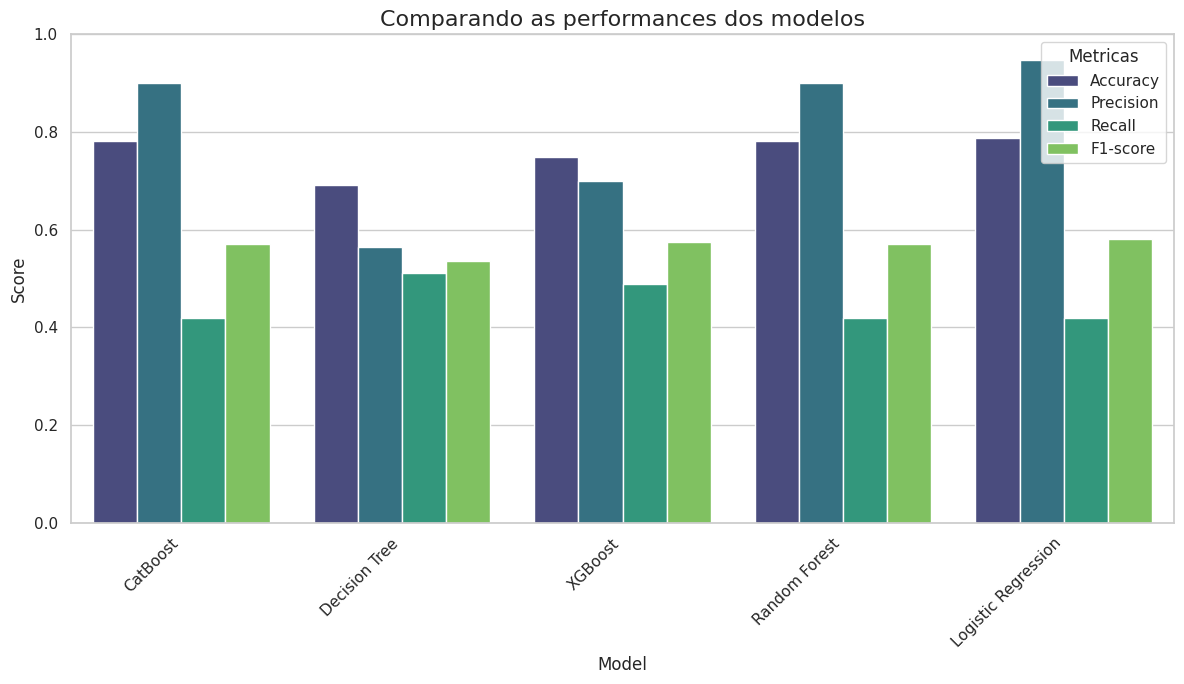

In [ ]:
evaluation_melted = evaluation_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=evaluation_melted, palette='viridis')
plt.title('Comparando as performances dos modelos', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Metricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualizando a comparação do tempo de treinamento

/tmp/ipython-input-3661908910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time (seconds)', data=training_time_df, palette='plasma')


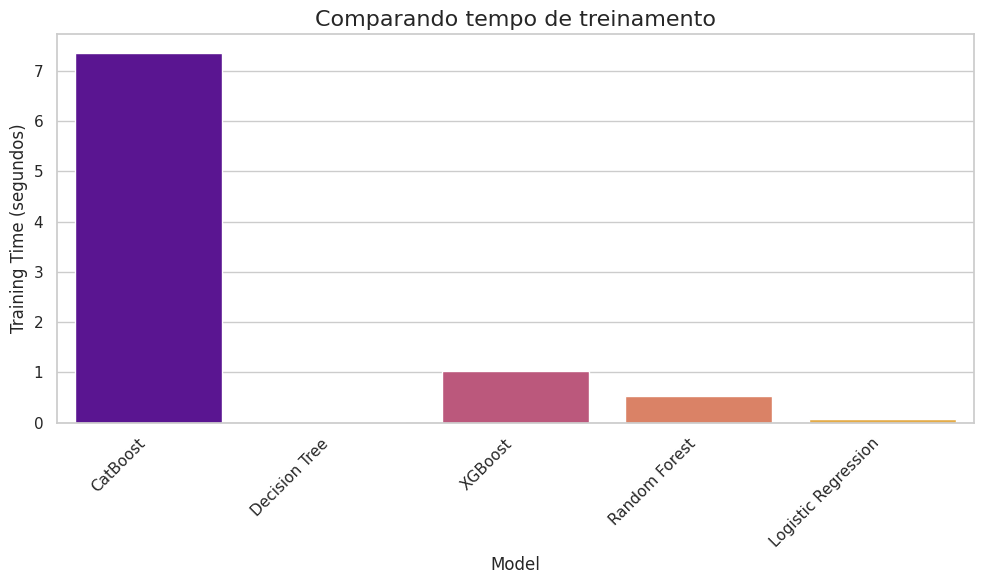

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (seconds)', data=training_time_df, palette='plasma')
plt.title('Comparando tempo de treinamento', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Training Time (segundos)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observando as importancias das features

In [ ]:
print("\nImportância das Features por Modelo:\n")

for name, model in trained_models.items():
    print(f"--- Importância das Features para {name} ---")
    try:
        # p baseados em arvores (Random Forest, Decision Tree, XGBoost, CatBoost)
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = X_train_no_id.columns
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
            display(feature_importance_df.head(10)) # top 10 features imprtantes

        elif hasattr(model, 'coef_'):
            # p classi binaria, uma linha de coeficiente
            coefs = model.coef_[0]
            feature_names = X_train_no_id.columns
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': abs(coefs)})
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
            display(feature_importance_df.head(10))
        else:
            print(f"Não foi possível obter a importância das features para {name}.")
    except Exception as e:
        print(f"Ocorreu um erro ao obter a importância das features para {name}: {e}")
    print("-" * 30)


Importância das Features por Modelo:

--- Importância das Features para CatBoost ---


,Feature,Importance
4,Indicador de histórico de crédito,27.403621
0,Renda do requerente,15.379839
2,Valor do empréstimo solicitado/aprovado,13.183664
1,Renda do co-requerente,11.837873
15,Zona/área de residência do requerente_Semiurbano,6.644259
3,Prazo do empréstimo (em meses),5.704874
16,Zona/área de residência do requerente_Urbano,3.122632
8,Casado_Sim,2.986205
12,Escolaridade_Não Graduado,2.946456
9,Dependentes_1,2.640871


------------------------------
--- Importância das Features para Decision Tree ---


,Feature,Importance
4,Indicador de histórico de crédito,0.293493
0,Renda do requerente,0.230246
2,Valor do empréstimo solicitado/aprovado,0.146664
1,Renda do co-requerente,0.099020
3,Prazo do empréstimo (em meses),0.056946
8,Casado_Sim,0.041050
9,Dependentes_1,0.036362
16,Zona/área de residência do requerente_Urbano,0.020582
6,Genero_Não informado,0.016501
15,Zona/área de residência do requerente_Semiurbano,0.014665


------------------------------
--- Importância das Features para XGBoost ---


,Feature,Importance
4,Indicador de histórico de crédito,0.415930
15,Zona/área de residência do requerente_Semiurbano,0.063117
3,Prazo do empréstimo (em meses),0.054434
12,Escolaridade_Não Graduado,0.050054
9,Dependentes_1,0.046522
5,Genero_Masculino,0.045524
1,Renda do co-requerente,0.044491
2,Valor do empréstimo solicitado/aprovado,0.041161
0,Renda do requerente,0.039154
8,Casado_Sim,0.035811


------------------------------
--- Importância das Features para Random Forest ---


,Feature,Importance
4,Indicador de histórico de crédito,0.254478
0,Renda do requerente,0.193482
2,Valor do empréstimo solicitado/aprovado,0.188438
1,Renda do co-requerente,0.105940
3,Prazo do empréstimo (em meses),0.053250
15,Zona/área de residência do requerente_Semiurbano,0.029041
8,Casado_Sim,0.025467
16,Zona/área de residência do requerente_Urbano,0.023508
12,Escolaridade_Não Graduado,0.022214
9,Dependentes_1,0.021119


------------------------------
--- Importância das Features para Logistic Regression ---


,Feature,Importance
4,Indicador de histórico de crédito,3.019383
15,Zona/área de residência do requerente_Semiurbano,0.724521
12,Escolaridade_Não Graduado,0.512650
9,Dependentes_1,0.501657
8,Casado_Sim,0.432175
10,Dependentes_2,0.286734
11,Dependentes_3+,0.134622
6,Genero_Não informado,0.124352
5,Genero_Masculino,0.120121
13,trabalhador autônomo_Não informado,0.094552


------------------------------


A analise de  quais variáveis (features) mais influenciam as decisões de cada modelo treinado. Para modelos baseados em árvores (como Random Forest, Decision Tree, XGBoost e CatBoost), utilizando o atributo feature_importances_, que indica o peso de cada variável na construção das árvores. Já para modelos lineares como a Regressão Logística, ele usa os coeficientes (coef_), convertendo-os em valores absolutos para medir a relevância.

O resultado é uma tabela com as 10 variáveis mais importantes para cada modelo, permitindo entender quais características dos clientes mais impactam na previsão de aprovação de empréstimos. Isso ajuda tanto na interpretação dos modelos quanto na tomada de decisões estratégicas.

Visualizando as features mais importantes para cada modelo

--- Importância das Features para CatBoost ---


/tmp/ipython-input-2379814272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


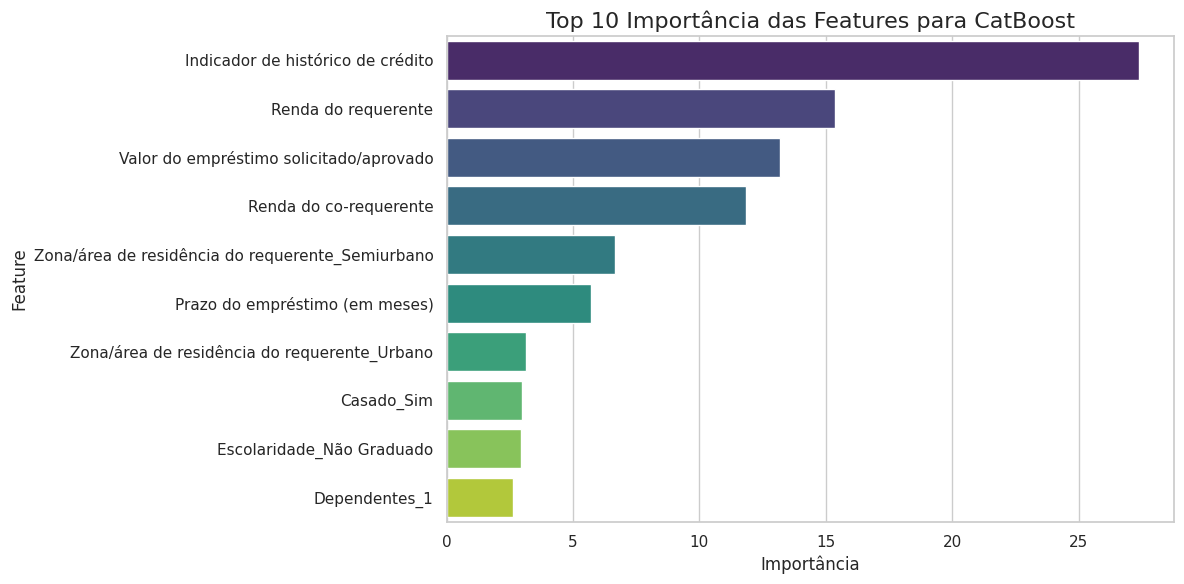

------------------------------
--- Importância das Features para Decision Tree ---


/tmp/ipython-input-2379814272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


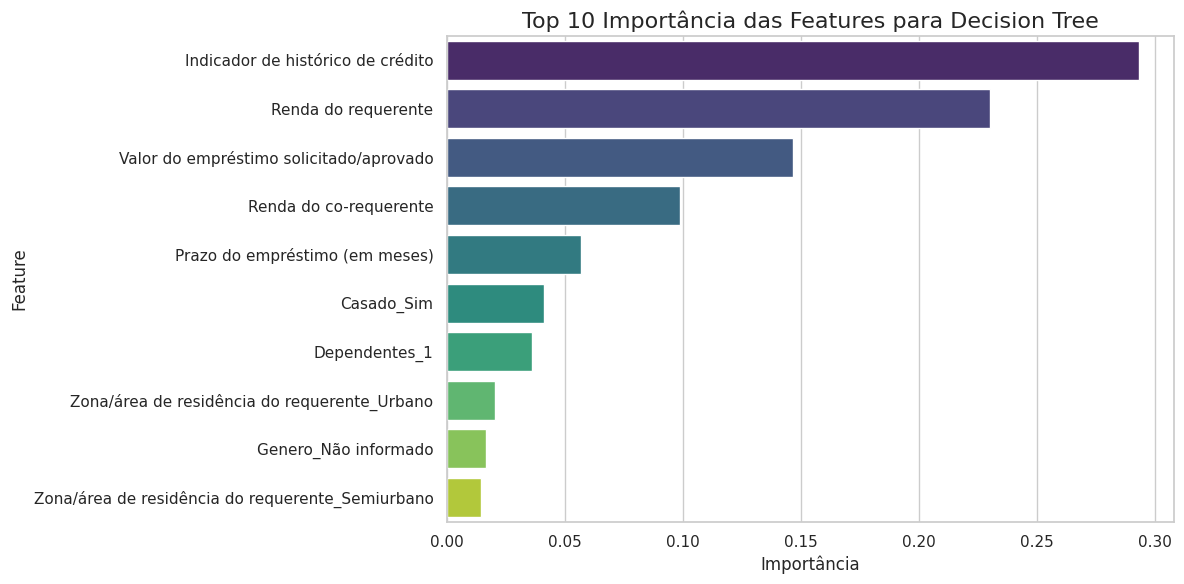

------------------------------
--- Importância das Features para XGBoost ---


/tmp/ipython-input-2379814272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


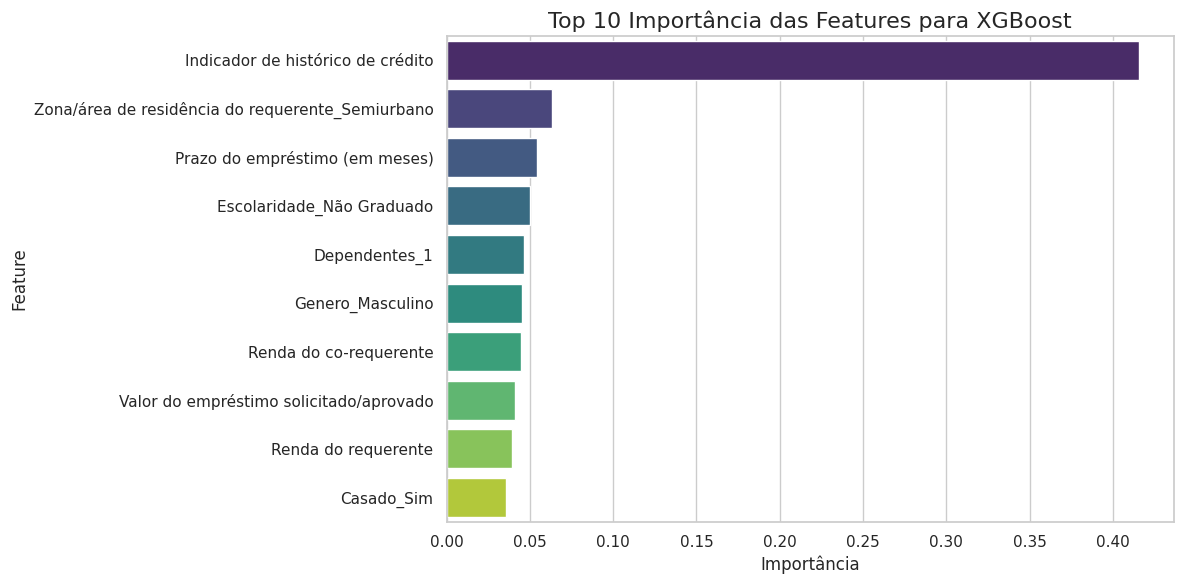

------------------------------
--- Importância das Features para Random Forest ---


/tmp/ipython-input-2379814272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


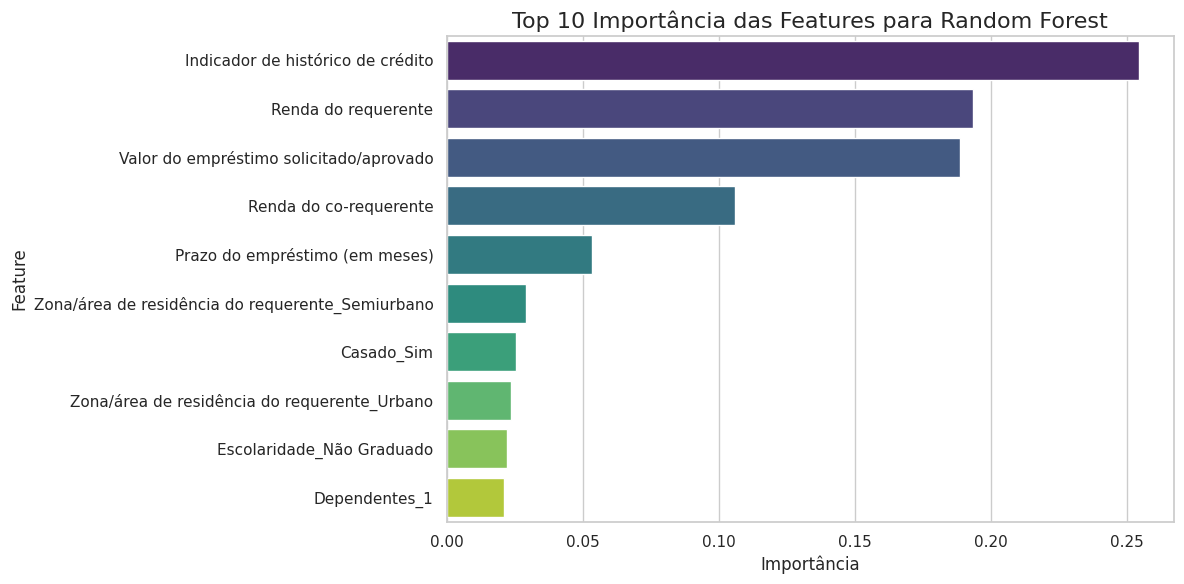

------------------------------
--- Importância das Features para Logistic Regression ---


/tmp/ipython-input-2379814272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


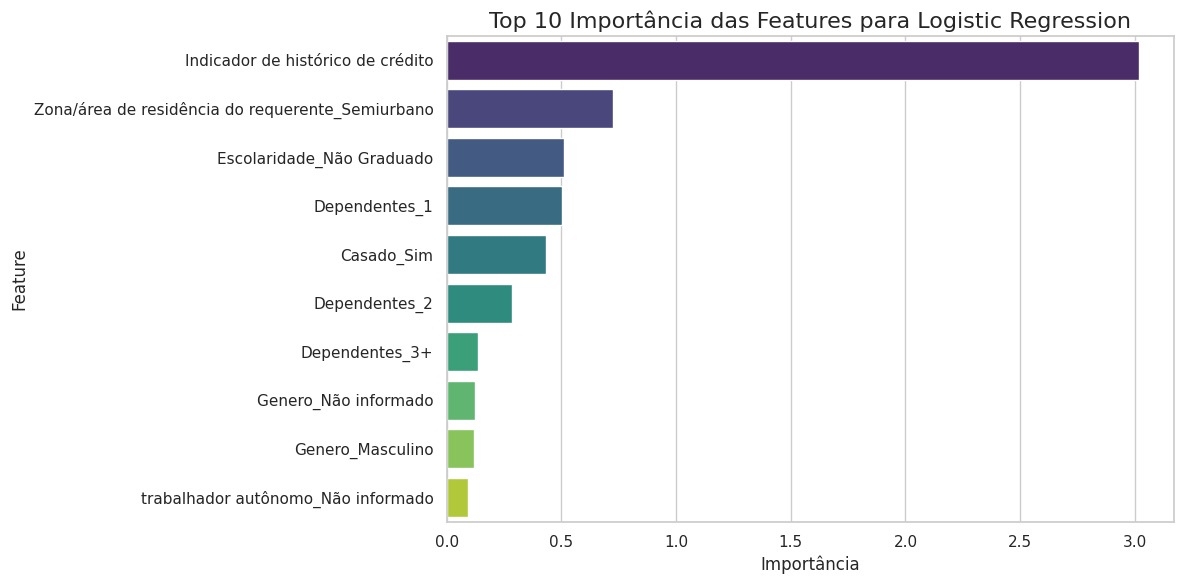

------------------------------


In [ ]:
for name, model in trained_models.items():
    print(f"--- Importância das Features para {name} ---")
    try:
        feature_importance_df = None
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = X_train_no_id.columns
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
        elif hasattr(model, 'coef_'):
            coefs = model.coef_[0]
            feature_names = X_train_no_id.columns
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': abs(coefs)}) #
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
        else:
            print(f"Não foi possível obter a importância das features para {name}.")

        if feature_importance_df is not None and not feature_importance_df.empty:
            plt.figure(figsize=(12, 6))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
            plt.title(f'Top 10 Importância das Features para {name}', fontsize=16)
            plt.xlabel('Importância', fontsize=12)
            plt.ylabel('Feature', fontsize=12)
            plt.tight_layout()
            plt.show()
        elif feature_importance_df is not None:
             print(f"Não há features com importância diferente de zero para {name}")


    except Exception as e:
        print(f"Ocorreu um erro ao obter ou visualizar a importância das features para {name}: {e}")
    print("-" * 30)

O modelo de Regressão Logística obteve a maior acurácia **(0.7886)** e maior precisão **(0.9474)** entre todos os modelos avaliados.

No contexto de previsão de risco de crédito, uma alta precisão é crucial, pois minimiza o número de falsos positivos (ou seja, aprovar empréstimos para indivíduos de alto risco), o que pode levar a grandes prejuízos financeiros para a empresa.

Embora outros modelos como CatBoost e Random Forest também apresentem alta acurácia e F1-score, a precisão superior da Regressão Logística a torna a escolha mais adequada para esse problema de negócio específico, onde minimizar falsos positivos é prioridade.

## Aplicando o modelo nos 20% dos dados não vistos

In [ ]:
logistic_regression_model = trained_models['Logistic Regression']

credit_approval_probabilities = logistic_regression_model.predict_proba(X_test_no_id)
prob_aprovacao = credit_approval_probabilities[:, 0]
results_df = pd.DataFrame({'ID': X_test['ID'], 'Probabilidade de Aprovação': prob_aprovacao})

results_df

,ID,Probabilidade de Aprovação
350,LP002139,0.872621
377,LP002223,0.891467
163,LP001570,0.824031
609,LP002978,0.765877
132,LP001478,0.857028
...,...,...
231,LP001768,0.921520
312,LP002006,0.771093
248,LP001824,0.729187
11,LP001027,0.851635


Definindo faixa de riscos

In [ ]:
def classify_risk(probability):
    if probability >= 0.7:
        return "Baixo Risco"
    elif probability >= 0.4:
        return "Médio Risco"
    else:
        return "Alto Risco"

results_df['Faixa de Risco'] = results_df['Probabilidade de Aprovação'].apply(classify_risk)

results_df

,ID,Probabilidade de Aprovação,Faixa de Risco
350,LP002139,0.872621,Baixo Risco
377,LP002223,0.891467,Baixo Risco
163,LP001570,0.824031,Baixo Risco
609,LP002978,0.765877,Baixo Risco
132,LP001478,0.857028,Baixo Risco
...,...,...,...
231,LP001768,0.921520,Baixo Risco
312,LP002006,0.771093,Baixo Risco
248,LP001824,0.729187,Baixo Risco
11,LP001027,0.851635,Baixo Risco


Nós previmos a probabilidade de aprovação e a faixa de risco para os clientes que estavam no conjunto de teste **(os 20% que o modelo não usou para aprender)**. Embora para esses clientes no conjunto de teste já saibamos o resultado real, usamos essa parte dos dados para:

**Avaliar o desempenho do modelo**: Comparando as previsões do modelo com o status real do empréstimo no conjunto de teste, pudemos medir quão bem o modelo consegue prever (**usando métricas como acurácia, precisão, recall, F1-score**). Isso nos ajuda a escolher o melhor modelo (**neste caso, a Regressão Logística se destacou em precisão).**

**Simular o uso em novos dados**: Ao prever para o conjunto de teste, estamos simulando o cenário real onde o modelo será aplicado: receber dados de um novo cliente e prever a probabilidade de aprovação antes que a decisão final seja tomada.

O objetivo final deste modelo é, prever o status de empréstimo para futuros clientes que solicitarem crédito.

Para esses futuros clientes, a empresa terá as informações cadastrais e financeiras, mas não saberá de antemão se o empréstimo será aprovado ou não. É aí que o modelo entra: ele usará os dados desses novos clientes para calcular a probabilidade de aprovação e ajudar a empresa a decidir.

**Respondendo a pergunta:**  Qual é a probabilidade de aprovação/risco de cada novo cliente, considerando suas informações cadastrais e financeiras?

In [ ]:
# calcular a quantidade total de clientes
total_clientes = df.shape[0]
clientes_aprovados = df[~df['Status final do pedido de empréstimo_Não aprovado']].shape[0]

porcentagem_aprovacao = (clientes_aprovados / total_clientes) * 100

print(f"Total de clientes no dataset: {total_clientes}")
print(f"Clientes com empréstimo aprovado: {clientes_aprovados}")
print(f"Porcentagem de aprovação de empréstimo: {porcentagem_aprovacao:.2f}%")

print("\nIsso significa que, com base neste dataset histórico, aproximadamente {:.2f}% dos clientes tiveram seus empréstimos aprovados.".format(porcentagem_aprovacao))

Total de clientes no dataset: 614
Clientes com empréstimo aprovado: 422
Porcentagem de aprovação de empréstimo: 68.73%

Isso significa que, com base neste dataset histórico, aproximadamente 68.73% dos clientes tiveram seus empréstimos aprovados.
